# Testing the Locative vs. Durative Division in Time Adverbials

Hypothesis: Locative and durative time adverbials constitute two distinct categories of time adverbials which function and behave differently in the clause.

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'aspect')

In [2]:
print(df.shape)
print(df_sg.shape)

(3648, 57)
(2575, 57)


In [3]:
df.head()

verse     book booksuper canon_part period times_etcbc  \
node                                                                   
427553  Genesis 1:1  Genesis   Genesis        Law    SBH      R>CJT/   
427680  Genesis 2:2  Genesis   Genesis        Law    SBH        JWM/   
427682  Genesis 2:2  Genesis   Genesis        Law    SBH        JWM/   
427693  Genesis 2:5  Genesis   Genesis        Law    SBH        VRM/   
427694  Genesis 2:5  Genesis   Genesis        Law    SBH        VRM/   

       times_utf8 times_utf8d times_POS            TA Heads  ... TIMEAPPO  \
node                                                         ...            
427553     ראשׁית       תישאר      NOUN  \texthebrew{ראשית}  ...      0.0   
427680        יום         םוי      NOUN    \texthebrew{יום}  ...      0.0   
427682        יום         םוי      NOUN    \texthebrew{יום}  ...      0.0   
427693        טרם         םרט      PREP    \texthebrew{טרם}  ...      0.0   
427694        טרם         םרט      PREP    \texthebrew{טרם}  ...      0.0   

       SPEC SFX3  SFX   DU DEMON  SFX1  SFX2 ADVB CARDC  
node                                                     
427553  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427680  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427682  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427693  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427694  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  

[5 rows x 57 columns]

In [4]:
df_sg.head()

verse     book booksuper canon_part period times_etcbc  \
node                                                                    
427553   Genesis 1:1  Genesis   Genesis        Law    SBH      R>CJT/   
427680   Genesis 2:2  Genesis   Genesis        Law    SBH        JWM/   
427682   Genesis 2:2  Genesis   Genesis        Law    SBH        JWM/   
427805   Genesis 3:8  Genesis   Genesis        Law    SBH        RWX/   
427835  Genesis 3:14  Genesis   Genesis        Law    SBH        JWM/   

       times_utf8 times_utf8d times_POS            TA Heads  ... TIMEAPPO  \
node                                                         ...            
427553     ראשׁית       תישאר      NOUN  \texthebrew{ראשית}  ...      0.0   
427680        יום         םוי      NOUN    \texthebrew{יום}  ...      0.0   
427682        יום         םוי      NOUN    \texthebrew{יום}  ...      0.0   
427805        רוח         חור      NOUN    \texthebrew{רוח}  ...      0.0   
427835        יום         םוי      NOUN    \texthebrew{יום}  ...      0.0   

       SPEC SFX3  SFX   DU DEMON  SFX1  SFX2 ADVB CARDC  
node                                                     
427553  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427680  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427682  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427805  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
427835  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  

[5 rows x 57 columns]

## Examining Lex Tokens

In [5]:
df_sg.lex_token.unique().shape

(70,)

In [6]:
token_ct_raw = pd.DataFrame(df_sg.lex_token.value_counts())

token_ct_raw.head()

lex_token
ה.ז׳              319
מ׳.ז׳             281
ב.ז׳              263
ב.ה.ז׳.הוא        221
ל.ז׳              205

Tokens >= 5 occurrences:

In [7]:
top_token_ct = token_ct_raw[token_ct_raw.lex_token >= 5]

print(top_token_ct.shape)

top_token_ct

(28, 1)


lex_token
ה.ז׳                319
מ׳.ז׳               281
ב.ז׳                263
ב.ה.ז׳.הוא          221
ל.ז׳                205
ב.ה.ז׳              195
ז׳                  153
ב.ה.ז׳.ס׳           146
עד.ז׳               139
ב.מ׳.ז׳              82
מן.ז׳                74
עד.ה.ז׳.זה           66
עד.ה.ז׳              64
ב.ה.ז׳.היא           61
ל.ה.ז׳               33
ה.ז׳.זה              29
אחר.ז׳               28
ב.ה.ז׳.הם            27
מן.מ׳.ז׳             23
ב.ה.ז׳.זה            21
כ.ה.ז׳               20
אחר.ה.ז׳.אלה         11
כ.ז׳                  9
כ.ה.ז׳.זה             8
בין.ה.ז׳              7
ל.מ׳.ז׳               7
ב.ה.ז׳.המה            6
ל.מן.ז׳               5

## Verb Lexeme

In [8]:
vlex_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(top_token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verb_utf8'],
    aggfunc='size',
    fill_value=0
)

vlex_ct = vlex_ct.loc[idx[:, ['location', 'duration']], :]

vlex_ct

verb_utf8            אבד  אבל  אגר  אהב  אוה  אור  אחר  אכל  אמן  אמץ  ...  \
lex_token  quality                                                     ...   
ב.ה.ז׳     location    0    0    2    0    1    0    1    5    0    0  ...   
ב.ה.ז׳.הוא location    1    0    0    0    0    0    0    3    0    0  ...   
ב.ה.ז׳.היא location    0    0    0    0    0    0    0    1    0    0  ...   
ב.ה.ז׳.הם  location    0    0    0    0    0    0    0    0    0    0  ...   
ב.ה.ז׳.המה location    0    0    0    0    0    0    0    0    0    0  ...   
ב.ה.ז׳.זה  location    0    0    0    0    0    0    0    1    0    0  ...   
ב.ה.ז׳.ס׳  location    0    0    0    0    0    0    0    4    0    0  ...   
ב.ז׳       location    2    0    0    0    0    0    0    3    0    0  ...   
ב.מ׳.ז׳    location    0    0    0    0    0    0    0    0    0    0  ...   
בין.ה.ז׳   location    0    0    0    0    0    0    0    1    0    0  ...   
ה.ז׳       location    0    0    0    0    0    0    0    6    0    0  ...   
ה.ז׳.זה    location    0    0    0    0    0    0    0    0    0    0  ...   
ז׳         location    0    0    0    0    0    0    0    0    0    0  ...   
כ.ה.ז׳     location    0    0    0    0    0    0    0    0    0    0  ...   
כ.ה.ז׳.זה  location    0    0    0    0    0    0    0    0    0    0  ...   
כ.ז׳       location    0    0    0    0    0    0    0    0    0    0  ...   
ל.ה.ז׳     location    0    0    0    0    0    0    0    0    0    0  ...   
ל.ז׳       location    0    0    0    0    0    0    0    0    0    0  ...   
מ׳.ז׳      location    0    0    0    0    0    0    0    0    0    0  ...   
ה.ז׳       duration    0    1    0    0    1    0    0    1    0    0  ...   
ז׳         duration    0    4    0    0    0    0    0    6    0    0  ...   
כ.ז׳       duration    0    0    0    0    0    0    0    0    0    0  ...   
ל.ה.ז׳     duration    0    0    0    0    0    0    0    0    0    0  ...   
ל.ז׳       duration    3    0    0    1    0    0    0    1    1    0  ...   
ל.מן.ז׳    duration    0    0    0    0    0    0    0    0    0    0  ...   
ל.מ׳.ז׳    duration    0    0    0    0    0    0    0    0    0    1  ...   
מן.ז׳      duration    0    0    0    0    0    0    0    0    0    0  ...   
מן.מ׳.ז׳   duration    0    0    0    0    0    0    0    0    0    0  ...   
מ׳.ז׳      duration    0    0    0    0    0    0    0   10    0    0  ...   
עד.ה.ז׳    duration    0    0    0    0    0    0    0    1    0    0  ...   
עד.ה.ז׳.זה duration    1    0    0    0    0    0    0    2    0    0  ...   
עד.ז׳      duration    0    2    0    1    0    1    0    0    3    0  ...   

verb_utf8            שׂוג  שׂחה  שׂחק  שׂים  שׂמח  שׂרר  תלה  תמם  תקע  תקף  
lex_token  quality                                                           
ב.ה.ז׳     location     0     0     0     0     0     0    0    0    1    0  
ב.ה.ז׳.הוא location     0     0     0     2     0     0    0    0    0    0  
ב.ה.ז׳.היא location     0     0     0     0     0     0    0    0    0    0  
ב.ה.ז׳.הם  location     0     0     0     0     0     0    0    0    0    0  
ב.ה.ז׳.המה location     0     0     0     0     0     0    0    0    0    0  
ב.ה.ז׳.זה  location     0     0     0     0     0     0    0    0    0    0  
ב.ה.ז׳.ס׳  location     0     0     0     0     0     0    0    0    0    0  
ב.ז׳       location     1     0     0     0     0     0    0    0    0    0  
ב.מ׳.ז׳    location     0     0     0     0     0     0    0    0    0    0  
בין.ה.ז׳   location     0     0     0     0     0     0    0    0    0    0  
ה.ז׳       location     0     0     0     0     0     0    0    0    0    0  
ה.ז׳.זה    location     0     0     0     0     0     0    0    0    0    0  
ז׳         location     0     0     0     0     0     0    0    0    0    0  
כ.ה.ז׳     location     0     0     0     1     0     0    0    0    0    0  
כ.ה.ז׳.זה  location     0     0     0     0     0     0    0    0    0    0  
כ.ז׳       location  

## Prune 

In [9]:
# drop verbs that only occur once
vlex_ct_ = vlex_ct.drop(
        columns=vlex_ct.columns[vlex_ct.sum() < 10]
    )

# re-filter rare tokens
vlex_ct_ = vlex_ct_.drop(
    index=vlex_ct_.index[vlex_ct_.sum(1) < 10]
)

In [10]:
vlex_ct_.shape

(20, 39)

In [11]:
# The raw counts for each token that is included in the model;
# we have restricted observations to those that occur >= 10 times
vlex_ct_.sum(1)

lex_token   quality 
ב.ה.ז׳      location    137
ב.ה.ז׳.הוא  location    136
ב.ה.ז׳.היא  location     36
ב.ה.ז׳.הם   location     14
ב.ה.ז׳.זה   location     14
ב.ה.ז׳.ס׳   location     90
ב.ז׳        location    122
ב.מ׳.ז׳     location     43
ה.ז׳        location    128
ה.ז׳.זה     location     17
כ.ה.ז׳      location     11
ל.ז׳        location     19
ה.ז׳        duration     43
ז׳          duration     62
ל.ז׳        duration     50
מן.ז׳       duration     17
מ׳.ז׳       duration    176
עד.ה.ז׳     duration     47
עד.ה.ז׳.זה  duration     37
עד.ז׳       duration     50
dtype: int64

## ΔP and PCA Analysis of Verb Lexeme Attractions

In [12]:
# ΔP attraction score
vlex_dp = sig.apply_deltaP(vlex_ct_, 0, 1)
vlex_dp = vlex_dp.dropna()
vlex_dp.head()

verb_utf8                 אכל       אמר       בוא       דבר       היה  \
lex_token  quality                                                      
ב.ה.ז׳     location  0.001424  0.003118  0.046329  0.004706 -0.000446   
ב.ה.ז׳.הוא location -0.014779  0.028110 -0.002438  0.004823  0.215898   
ב.ה.ז׳.היא location -0.007672  0.115806  0.001969  0.017885 -0.082875   
ב.ה.ז׳.הם  location -0.035628  0.045518 -0.054251 -0.010526  0.283806   
ב.ה.ז׳.זה  location  0.036611 -0.026721  0.017987  0.061712 -0.005147   

verb_utf8                 הלך       זכר       חיה       חלל       טמא  ...  \
lex_token  quality                                                     ...   
ב.ה.ז׳     location -0.015183  0.004706 -0.023381 -0.008993 -0.035971  ...   
ב.ה.ז׳.הוא location -0.006857 -0.011680 -0.023360 -0.008985 -0.027687  ...   
ב.ה.ז׳.היא location  0.007168 -0.010717 -0.021434 -0.008244 -0.032976  ...   
ב.ה.ז׳.הם  location -0.021053 -0.010526 -0.021053  0.136379 -0.032389  ...   
ב.ה.ז׳.זה  location -0.021053 -0.010526 -0.021053 -0.008097 -0.032389  ...   

verb_utf8                 קרא       קרב       ראה      שׁוב      שׁכב  \
lex_token  quality                                                      
ב.ה.ז׳     location -0.009682 -0.004391 -0.022377 -0.003387  0.007404   
ב.ה.ז׳.הוא location  0.006950 -0.004327  0.002458 -0.003264 -0.008985   
ב.ה.ז׳.היא location  0.004695 -0.011542 -0.028030  0.067670 -0.008244   
ב.ה.ז׳.הם  location -0.023482 -0.011336  0.044708 -0.017814 -0.008097   
ב.ה.ז׳.זה  location  0.048757 -0.011336 -0.027530 -0.017814 -0.008097   

verb_utf8                שׁכם      שׁלח      שׁמר      שׁפט      שׂים  
lex_token  quality                                                     
ב.ה.ז׳     location  0.211679 -0.007089 -0.000794 -0.013489 -0.009892  
ב.ה.ז׳.הוא location -0.026056 -0.015274 -0.008985 -0.013477  0.006620  
ב.ה.ז׳.היא location -0.023908  0.071792 -0.008244  0.016236 -0.009068  
ב.ה.ז׳.הם  location -0.023482 -0.013765 -0.008097 -0.012146 -0.008907  
ב.ה.ז׳.זה  location -0.023482 -0.013765 -0.008097 -0.012146 -0.008907  

[5 rows x 39 columns]

In [13]:
corr_matrix = vlex_dp.corr()
corr_matrix.head()

verb_utf8       אכל       אמר       בוא       דבר       היה       הלך  \
verb_utf8                                                               
אכל        1.000000 -0.365616 -0.125931  0.148071 -0.096834 -0.038449   
אמר       -0.365616  1.000000  0.128299 -0.113354  0.194682  0.145894   
בוא       -0.125931  0.128299  1.000000  0.125711  0.150202 -0.190844   
דבר        0.148071 -0.113354  0.125711  1.000000 -0.075185 -0.169580   
היה       -0.096834  0.194682  0.150202 -0.075185  1.000000  0.239204   

verb_utf8       זכר       חיה       חלל       טמא  ...       קרא       קרב  \
verb_utf8                                          ...                       
אכל        0.016391  0.381949 -0.377757 -0.031982  ...  0.087073  0.156588   
אמר       -0.366543 -0.376057  0.229671 -0.086927  ... -0.295634 -0.006327   
בוא       -0.362152 -0.440048 -0.158861 -0.255458  ... -0.146024  0.329191   
דבר        0.176803 -0.242071 -0.203730 -0.143007  ...  0.460469 -0.020822   
היה       -0.180414 -0.278208  0.204998 -0.316280  ... -0.102659  0.385275   

verb_utf8       ראה      שׁוב      שׁכב      שׁכם      שׁלח      שׁמר  \
verb_utf8                                                               
אכל       -0.243869 -0.218951  0.025149  0.069510 -0.285996 -0.116292   
אמר       -0.017291  0.642702 -0.150167 -0.018073  0.573941 -0.140268   
בוא       -0.197926  0.226980 -0.203832  0.241869  0.387280 -0.329749   
דבר       -0.103078 -0.083812 -0.149616  0.038348 -0.190534 -0.210405   
היה        0.155425 -0.313739 -0.270322  0.008768 -0.267184  0.032033   

verb_utf8      שׁפט      שׂים  
verb_utf8                      
אכל        0.238958 -0.069047  
אמר       -0.023678  0.018185  
בוא       -0.211864 -0.034106  
דבר       -0.104219 -0.262451  
היה       -0.148696 -0.183089  

[5 rows x 39 columns]

In [14]:
# See how correlated the features are
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [15]:
sol.head(20)

verb_utf8  verb_utf8
טמא        שׁכב         0.941799
שׁוב       שׁלח         0.850363
חלל        ישׁע         0.845625
הלך        ירא          0.795164
קום        שׁכם         0.788682
נגד        נשׂא         0.746010
חיה        עבד          0.706459
זכר        שׁמר         0.672825
חלל        ראה          0.672324
ידע        צוה          0.652341
אמר        שׁוב         0.642702
ישׁע       ראה          0.625738
ירא        נשׂא         0.623866
יצא        שׁוב         0.588164
נתן        שׁוב         0.585878
חיה        מלך          0.585698
אמר        שׁלח         0.573941
כון        לין          0.572630
עבד        שׁפט         0.568828
לקח        קרב          0.549560
dtype: float64

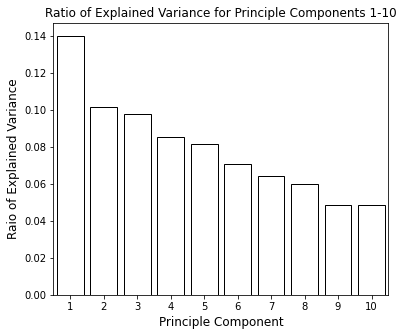

explained variance:
[0.14000538 0.10146303 0.09792021 0.08555597 0.08148031 0.07091931
 0.06420523 0.05996725 0.04864884 0.04830269]


In [27]:
pca_values, loadings = apply_pca(vlex_dp, 0, 1, components=10)

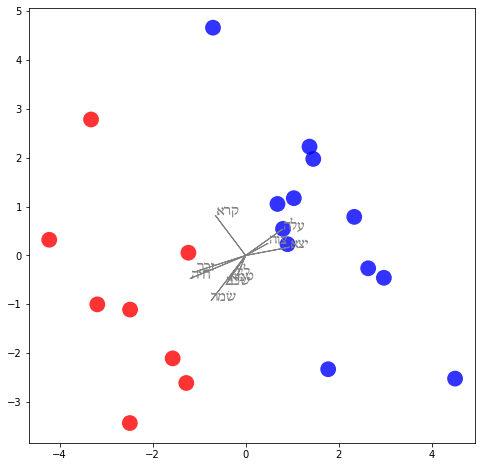

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 250

vals = pca_values.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.8)], edgecolor=[], s=s)

vals = pca_values.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.8)], edgecolor=[], s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
}
top_loadings = loadings.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = loadings[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_VLEX')

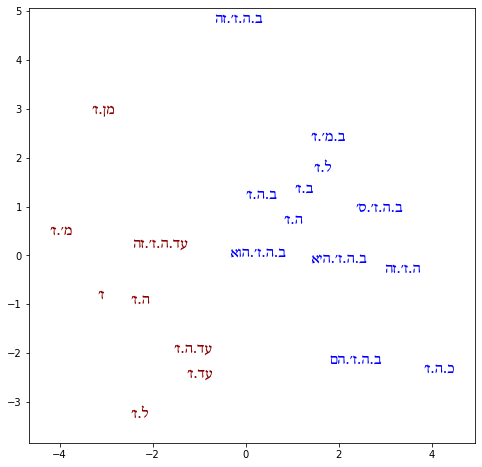

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (pca_values.iloc[:,0], pca_values.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in pca_values.index:
    tx, ty = pca_values.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_VLEX_text')

### Extract Lexemes with Negative x-axis Influence

In [33]:
loadings.loc[1][loadings.loc[1] < 0].index

Index(['אכל', 'דבר', 'הלך', 'זכר', 'חיה', 'טמא', 'ירא', 'ישׁב', 'כון', 'לין',
       'מלך', 'נגד', 'נשׂא', 'עבד', 'קרא', 'שׁכב', 'שׁמר', 'שׁפט'],
      dtype='object', name='verb_utf8')

In [40]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == 'DBR[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                                   clause verb_utf8  \
node                                                                      
472270  Isaiah 48:16  לֹ֤א מֵרֹאשׁ֙ בַּסֵּ֣תֶר דִּבַּ֔רְתִּי        דבר   

             function  
node                   
472270  posterior_dur

In [44]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == 'NGD[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                            clause verb_utf8  \
node                                                               
471286  Isaiah 40:21  הֲלֹ֛וא הֻגַּ֥ד מֵרֹ֖אשׁ לָכֶ֑ם        נגד   
471465  Isaiah 41:26           מִֽי־הִגִּ֤יד מֵרֹאשׁ֙        נגד   
472085  Isaiah 46:10  מַגִּ֤יד מֵֽרֵאשִׁית֙ אַחֲרִ֔ית        נגד   
493904  Psalms 75:10       וַ֭אֲנִי אַגִּ֣יד לְעֹלָ֑ם        נגד   

             function  
node                   
471286  posterior_dur  
471465  posterior_dur  
472085  posterior_dur  
493904   anterior_dur

In [45]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == 'CPV[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                                             clause  \
node                                                                       
452419    Judges 10:2  וַיִּשְׁפֹּט֙ אֶת־יִשְׂרָאֵ֔ל עֶשְׂרִ֥ים וְשָׁ...   
452423    Judges 10:3  וַיִּשְׁפֹּט֙ אֶת־יִשְׂרָאֵ֔ל עֶשְׂרִ֥ים וּשְׁ...   
452699    Judges 12:7  וַיִּשְׁפֹּ֥ט יִפְתָּ֛ח אֶת־יִשְׂרָאֵ֖ל שֵׁ֣שׁ...   
452706    Judges 12:9   וַיִּשְׁפֹּ֥ט אֶת־יִשְׂרָאֵ֖ל שֶׁ֥בַע שָׁנִֽים׃    
452710   Judges 12:11   וַיִּשְׁפֹּ֥ט אֶת־יִשְׂרָאֵ֖ל עֶ֥שֶׂר שָׁנִֽים׃    
452716   Judges 12:14  וַיִּשְׁפֹּ֥ט אֶת־יִשְׂרָאֵ֖ל שְׁמֹנֶ֥ה שָׁנִֽ...   
453244   Judges 16:31  וְה֛וּא שָׁפַ֥ט אֶת־יִשְׂרָאֵ֖ל עֶשְׂרִ֥ים שָׁ...   
454304  1_Samuel 3:13  כִּֽי־שֹׁפֵ֥ט אֲנִ֛י אֶת־בֵּיתֹ֖ו עַד־עֹולָ֑ם ...   
454438  1_Samuel 4:18  וְה֛וּא שָׁפַ֥ט אֶת־יִשְׂרָאֵ֖ל אַרְבָּעִ֥ים ש...   
454684  1_Samuel 7:15  וַיִּשְׁפֹּ֤ט שְׁמוּאֵל֙ אֶת־יִשְׂרָאֵ֔ל כֹּ֖ל...   
494343    Psalms 82:2                    עַד־מָתַ֥י תִּשְׁפְּטוּ־עָ֑וֶל    

       verb_utf8      function  
node                            
452419      שׁפט    atelic_ext  
452423      שׁפט    atelic_ext  
452699      שׁפט    atelic_ext  
452706      שׁפט    atelic_ext  
452710      שׁפט    atelic_ext  
452716      שׁפט    atelic_ext  
453244      שׁפט    atelic_ext  
454304      שׁפט  anterior_dur  
454438      שׁפט    atelic_ext  
454684      שׁפט    atelic_ext  
494343      שׁפט  anterior_dur

In [42]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == 'QR>[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                                             clause  \
node                                                                            
446821   Deuteronomy 17:19                וְקָ֥רָא בֹ֖ו כָּל־יְמֵ֣י חַיָּ֑יו    
449145          Joshua 5:9  וַיִּקְרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ גִּלְגָּ֔...   
449433         Joshua 7:26  עַל־כֵּ֠ן קָרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ עֵ֣מ...   
452427         Judges 10:4  לָהֶ֞ם יִקְרְא֣וּ׀ חַוֹּ֣ת יָאִ֗יר עַ֚ד הַיֹּ֣...   
453054        Judges 15:19  עַל־כֵּ֣ן׀ קָרָ֣א שְׁמָ֗הּ עֵ֤ין הַקֹּורֵא֙ עַ...   
453369        Judges 18:12  עַל־כֵּ֡ן קָרְאוּ֩ לַמָּקֹ֨ום הַה֜וּא מַחֲנֵה־...   
469231        Isaiah 14:20        לֹֽא־יִקָּרֵ֥א לְעֹולָ֖ם זֶ֥רַע מְרֵעִֽים׃    
471351         Isaiah 41:4                        קֹרֵ֥א הַדֹּרֹ֖ות מֵרֹ֑אשׁ    
472234         Isaiah 48:8                         וּמִבֶּ֖טֶן קֹ֥רָא לָֽךְ׃    
472305         Isaiah 49:1                      יְהוָה֙ מִבֶּ֣טֶן קְרָאָ֔נִי    
482154       Ezekiel 20:29  וַיִּקָּרֵ֤א שְׁמָהּ֙ בָּמָ֔ה עַ֖ד הַיֹּ֥ום הַ...   
494503         Psalms 86:3           כִּ֥י אֵלֶ֥יךָ אֶ֝קְרָ֗א כָּל־הַיֹּֽום׃    
509293        Nehemiah 9:3  וַֽיִּקְרְא֗וּ בְּסֵ֨פֶר תֹּורַ֧ת יְהוָ֛ה אֱלֹ...   
510974  1_Chronicles 13:11  וַיִּקְרָ֞א לַמָּקֹ֤ום הַהוּא֙ פֶּ֣רֶץ עֻזָּ֔א...   
514038  2_Chronicles 20:26  עַל־כֵּ֡ן קָֽרְא֞וּ אֶת־שֵׁ֨ם הַמָּקֹ֥ום הַה֛ו...   

       verb_utf8       function  
node                             
446821       קרא     atelic_ext  
449145       קרא   anterior_dur  
449433       קרא   anterior_dur  
452427       קרא   anterior_dur  
453054       קרא   anterior_dur  
453369       קרא   anterior_dur  
469231       קרא   anterior_dur  
471351       קרא  posterior_dur  
472234       קרא  posterior_dur  
472305       קרא  posterior_dur  
482154       קרא   anterior_dur  
494503       קרא     atelic_ext  
509293       קרא     atelic_ext  
510974       קרא   anterior_dur  
514038       קרא   anterior_dur

In [41]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == '>KL[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                                             clause  \
node                                                                           
427835       Genesis 3:14          וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃    
427851       Genesis 3:17  בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...   
431215      Genesis 32:33  עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...   
434785       Exodus 12:15             שִׁבְעַ֤ת יָמִים֙ מַצֹּ֣ות תֹּאכֵ֔לוּ    
434937        Exodus 13:6                שִׁבְעַ֥ת יָמִ֖ים תֹּאכַ֣ל מַצֹּ֑ת    
434939        Exodus 13:7      מַצֹּות֙ יֵֽאָכֵ֔ל אֵ֖ת שִׁבְעַ֣ת הַיָּמִ֑ים    
435400       Exodus 16:35  וּבְנֵ֣י יִשְׂרָאֵ֗ל אָֽכְל֤וּ אֶת־הַמָּן֙ אַר...   
436055       Exodus 23:15  שִׁבְעַ֣ת יָמִים֩ תֹּאכַ֨ל מַצֹּ֜ות לְמֹועֵד֙ ...   
437248       Exodus 34:18               שִׁבְעַ֨ת יָמִ֜ים תֹּאכַ֤ל מַצֹּות֙    
440284     Leviticus 23:6            שִׁבְעַ֥ת יָמִ֖ים מַצֹּ֥ות תֹּאכֵֽלוּ׃    
440306    Leviticus 23:14  וְלֶחֶם֩ וְקָלִ֨י וְכַרְמֶ֜ל לֹ֣א תֹֽאכְל֗וּ ע...   
440537    Leviticus 25:22  וַאֲכַלְתֶּ֖ם מִן־הַתְּבוּאָ֣ה יָשָׁ֑ן עַ֣ד׀ ה...   
441487        Numbers 6:4       כֹּ֖ל יְמֵ֣י נִזְרֹ֑ו מִכֹּל֩ לֹ֥א יֹאכֵֽל׃    
442103      Numbers 11:19                     לֹ֣א יֹ֥ום אֶחָ֛ד תֹּאכְל֖וּן    
442121      Numbers 11:21                       וְאָכְל֖וּ חֹ֥דֶשׁ יָמִֽים׃    
444093      Numbers 28:17              שִׁבְעַ֣ת יָמִ֔ים מַצֹּ֖ות יֵאָכֵֽל׃    
446668   Deuteronomy 16:3  שִׁבְעַ֥ת יָמִ֛ים תֹּֽאכַל־עָלָ֥יו מַצֹּ֖ות לֶ...   
446688   Deuteronomy 16:8                שֵׁ֥שֶׁת יָמִ֖ים תֹּאכַ֣ל מַצֹּ֑ות    
455482     1_Samuel 14:24                אֲשֶׁר־יֹ֨אכַל לֶ֜חֶם עַד־הָעֶ֗רֶב    
458182      2_Samuel 2:26                       הֲלָנֶ֨צַח֙ תֹּ֣אכַל חֶ֔רֶב    
463654      1_Kings 17:15      וַתֹּ֧אכַל הִֽיא־וָה֛וּא וּבֵיתָ֖הּ יָמִֽים׃    
471040       Isaiah 37:30                       אָכֹ֤ול הַשָּׁנָה֙ סָפִ֔יחַ    
504214  Ecclesiastes 5:16            גַּ֥ם כָּל־יָמָ֖יו בַּחֹ֣שֶׁךְ יֹאכֵ֑ל    

       verb_utf8      function  
node                            
427835       אכל    atelic_ext  
427851       אכל    atelic_ext  
431215       אכל  anterior_dur  
434785       אכל    atelic_ext  
434937       אכל    atelic_ext  
434939       אכל    atelic_ext  
435400       אכל    atelic_ext  
436055       אכל    atelic_ext  
437248       אכל    atelic_ext  
440284       אכל    atelic_ext  
440306       אכל  anterior_dur  
440537       אכל  anterior_dur  
441487       אכל    atelic_ext  
442103       אכל    atelic_ext  
442121       אכל    atelic_ext  
444093       אכל    atelic_ext  
446668       אכל    atelic_ext  
446688       אכל    atelic_ext  
455482       אכל  anterior_dur  
458182       אכל  anterior_dur  
463654       אכל    atelic_ext  
471040       אכל    atelic_ext  
504214       אכל    atelic_ext

In [41]:
# examine the interesting cases
df_sg[
    (df_sg.verb_etcbc == '>KL[')
    & (df_sg.quality == 'duration')
][['verse', 'clause', 'verb_utf8', 'function']]

verse                                             clause  \
node                                                                           
427835       Genesis 3:14          וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃    
427851       Genesis 3:17  בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...   
431215      Genesis 32:33  עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...   
434785       Exodus 12:15             שִׁבְעַ֤ת יָמִים֙ מַצֹּ֣ות תֹּאכֵ֔לוּ    
434937        Exodus 13:6                שִׁבְעַ֥ת יָמִ֖ים תֹּאכַ֣ל מַצֹּ֑ת    
434939        Exodus 13:7      מַצֹּות֙ יֵֽאָכֵ֔ל אֵ֖ת שִׁבְעַ֣ת הַיָּמִ֑ים    
435400       Exodus 16:35  וּבְנֵ֣י יִשְׂרָאֵ֗ל אָֽכְל֤וּ אֶת־הַמָּן֙ אַר...   
436055       Exodus 23:15  שִׁבְעַ֣ת יָמִים֩ תֹּאכַ֨ל מַצֹּ֜ות לְמֹועֵד֙ ...   
437248       Exodus 34:18               שִׁבְעַ֨ת יָמִ֜ים תֹּאכַ֤ל מַצֹּות֙    
440284     Leviticus 23:6            שִׁבְעַ֥ת יָמִ֖ים מַצֹּ֥ות תֹּאכֵֽלוּ׃    
440306    Leviticus 23:14  וְלֶחֶם֩ וְקָלִ֨י וְכַרְמֶ֜ל לֹ֣א תֹֽאכְל֗וּ ע...   
440537    Leviticus 25:22  וַאֲכַלְתֶּ֖ם מִן־הַתְּבוּאָ֣ה יָשָׁ֑ן עַ֣ד׀ ה...   
441487        Numbers 6:4       כֹּ֖ל יְמֵ֣י נִזְרֹ֑ו מִכֹּל֩ לֹ֥א יֹאכֵֽל׃    
442103      Numbers 11:19                     לֹ֣א יֹ֥ום אֶחָ֛ד תֹּאכְל֖וּן    
442121      Numbers 11:21                       וְאָכְל֖וּ חֹ֥דֶשׁ יָמִֽים׃    
444093      Numbers 28:17              שִׁבְעַ֣ת יָמִ֔ים מַצֹּ֖ות יֵאָכֵֽל׃    
446668   Deuteronomy 16:3  שִׁבְעַ֥ת יָמִ֛ים תֹּֽאכַל־עָלָ֥יו מַצֹּ֖ות לֶ...   
446688   Deuteronomy 16:8                שֵׁ֥שֶׁת יָמִ֖ים תֹּאכַ֣ל מַצֹּ֑ות    
455482     1_Samuel 14:24                אֲשֶׁר־יֹ֨אכַל לֶ֜חֶם עַד־הָעֶ֗רֶב    
458182      2_Samuel 2:26                       הֲלָנֶ֨צַח֙ תֹּ֣אכַל חֶ֔רֶב    
463654      1_Kings 17:15      וַתֹּ֧אכַל הִֽיא־וָה֛וּא וּבֵיתָ֖הּ יָמִֽים׃    
471040       Isaiah 37:30                       אָכֹ֤ול הַשָּׁנָה֙ סָפִ֔יחַ    
504214  Ecclesiastes 5:16            גַּ֥ם כָּל־יָמָ֖יו בַּחֹ֣שֶׁךְ יֹאכֵ֑ל    

       verb_utf8      function  
node                            
427835       אכל    atelic_ext  
427851       אכל    atelic_ext  
431215       אכל  anterior_dur  
434785       אכל    atelic_ext  
434937       אכל    atelic_ext  
434939       אכל    atelic_ext  
435400       אכל    atelic_ext  
436055       אכל    atelic_ext  
437248       אכל    atelic_ext  
440284       אכל    atelic_ext  
440306       אכל  anterior_dur  
440537       אכל  anterior_dur  
441487       אכל    atelic_ext  
442103       אכל    atelic_ext  
442121       אכל    atelic_ext  
444093       אכל    atelic_ext  
446668       אכל    atelic_ext  
446688       אכל    atelic_ext  
455482       אכל  anterior_dur  
458182       אכל  anterior_dur  
463654       אכל    atelic_ext  
471040       אכל    atelic_ext  
504214       אכל    atelic_ext

# Tense

Showing that the Association doesn't go both ways.

In [19]:
vtense_ct = pd.pivot_table(
    df_sg[df_sg.lex_token.isin(top_token_ct.index)],
    index=['lex_token', 'quality'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0
)

vtense_ct = vtense_ct.loc[idx[:, ['location', 'duration']], :]
vtense_ct = vtense_ct[['qtl', 'wayq', 'yqtl', 'wqtl']]

vtense_ct

verbform             qtl  wayq  yqtl  wqtl
lex_token  quality                        
ב.ה.ז׳     location   19    64    44    21
ב.ה.ז׳.הוא location   24    77    56    54
ב.ה.ז׳.היא location   17    26    11     1
ב.ה.ז׳.הם  location   10     4     5     0
ב.ה.ז׳.המה location    1     0     3     1
ב.ה.ז׳.זה  location    6     4     7     4
ב.ה.ז׳.ס׳  location   18    44    35    15
ב.ז׳       location   76    12    79    16
ב.מ׳.ז׳    location   35    23     3     2
בין.ה.ז׳   location    0     0     5     1
ה.ז׳       location   62    16    32     7
ה.ז׳.זה    location   14     1     7     2
ז׳         location    2     0     3     1
כ.ה.ז׳     location    2     0     9     0
כ.ה.ז׳.זה  location    2     2     0     0
כ.ז׳       location    3     1     1     0
ל.ה.ז׳     location    0     2     4     1
ל.ז׳       location    3     8    11     0
מ׳.ז׳      location    2     0     2     0
ה.ז׳       duration   19    12    17    10
ז׳         duration   14    27    38     7
כ.ז׳       duration    1     0     0     0
ל.ה.ז׳     duration    0     0     1     0
ל.ז׳       duration   12     2    78     9
ל.מן.ז׳    duration    1     0     0     0
ל.מ׳.ז׳    duration    1     2     0     0
מן.ז׳      duration   21     1     0     0
מן.מ׳.ז׳   duration    1     0     0     0
מ׳.ז׳      duration   71    79    51    18
עד.ה.ז׳    duration    2    14    15    23
עד.ה.ז׳.זה duration   18    27     4     0
עד.ז׳      duration    9     7    65    13

In [20]:
# drop verbs that only occur once
vtense_ct_ = vtense_ct.drop(
        columns=vtense_ct.columns[vtense_ct.sum() < 10]
    )

# re-filter rare tokens
vtense_ct_ = vtense_ct_.drop(
    index=vtense_ct_.index[vtense_ct_.sum(1) < 10]
)

In [21]:
vtense_ct_.shape

(20, 4)

In [22]:
vtense_ct_.sum(1)

lex_token   quality 
ב.ה.ז׳      location    148
ב.ה.ז׳.הוא  location    211
ב.ה.ז׳.היא  location     55
ב.ה.ז׳.הם   location     19
ב.ה.ז׳.זה   location     21
ב.ה.ז׳.ס׳   location    112
ב.ז׳        location    183
ב.מ׳.ז׳     location     63
ה.ז׳        location    117
ה.ז׳.זה     location     24
כ.ה.ז׳      location     11
ל.ז׳        location     22
ה.ז׳        duration     58
ז׳          duration     86
ל.ז׳        duration    101
מן.ז׳       duration     22
מ׳.ז׳       duration    219
עד.ה.ז׳     duration     54
עד.ה.ז׳.זה  duration     49
עד.ז׳       duration     94
dtype: int64

## PCA Analysis with Tense (To prove the effect is not the same)

In [23]:
vtense_dp = sig.apply_deltaP(vtense_ct_, 0, 1)
vtense_dp = vtense_dp.dropna()
vtense_dp.head()

verbform                  qtl      wayq      yqtl      wqtl
lex_token  quality                                         
ב.ה.ז׳     location -0.156303  0.179967 -0.046555  0.022891
ב.ה.ז׳.הוא location -0.179809  0.110471 -0.085077  0.154415
ב.ה.ז׳.היא location  0.039574  0.211265 -0.144486 -0.106353
ב.ה.ז׳.הם  location  0.258437 -0.058565 -0.077448 -0.122424
ב.ה.ז׳.זה  location  0.015083 -0.078941 -0.006472  0.070331

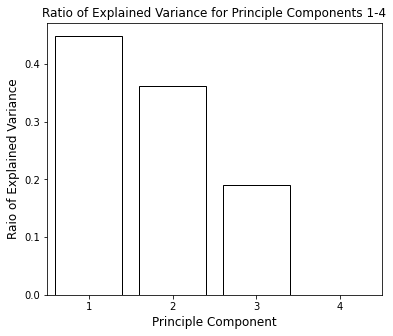

explained variance:
[4.48944292e-01 3.61263580e-01 1.89792129e-01 4.56996746e-33]


In [24]:
vtense_pca, vtense_loadings = apply_pca(vtense_dp, 0, 1, components=4)

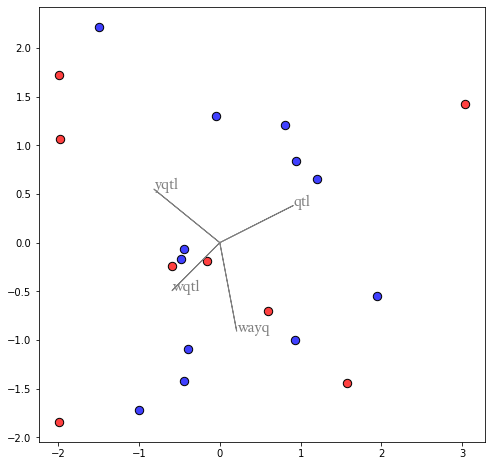

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70

vals = vtense_pca.loc[idx[:,'duration'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(1, 0, 0, 0.75)], edgecolor='black', s=s)

vals = vtense_pca.loc[idx[:,'location'],:]
x, y = (vals.iloc[:,0], vals.iloc[:,1])
ax.scatter(x, y, facecolor=[(0, 0, 1, 0.75)], edgecolor='black', s=s)

skip_feat = ['ordinal', 'demonstrative']
offsets = {
}
top_loadings2 = vtense_loadings.abs().sum().sort_values(ascending=False).index[:10]
texts = []
for feature in top_loadings2:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings[feature][:2]
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
#adjust_text(texts)
    
out.plot('PCA_durVSloc_TENSE')

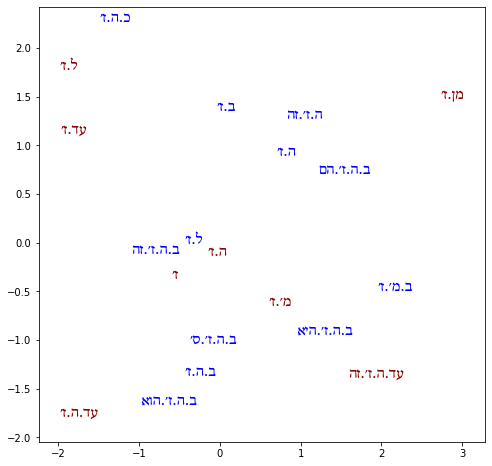

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca.iloc[:,0], vtense_pca.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
qual2col = {'location': 'blue', 'duration': 'darkred'}
for lex_tok, qual in vtense_pca.index:
    tx, ty = vtense_pca.loc[idx[lex_tok, qual]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=15, 
                          color=qual2col[qual], fontfamily='SBL Biblit'))
adjust_text(texts)
out.plot('PCA_durVSloc_TENSE_text')